In [15]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="hpBch64Lzd94eBxm0cQu")
project = rf.workspace("ggsipu-vc4iw").project("fc-vww2r")
version = project.version(1)
dataset = version.download("yolov8")


Defaulting to user installation because normal site-packages is not writeable
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.27, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to FC-1 in yolov8:: 100%|██████████| 13596/13596 [00:01<00:00, 9661.18it/s] 


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Train the model with 2 GPUs
results = model.train(data='FC-1/data.yaml', epochs=10, imgsz=640, device='mps')


image 1/1 /Users/hojoonkim/Documents/Univercity/2024-1/ComputerVison/langserve_ollama-main/YOLOv8/../image/test.jpg: 640x640 1 Banana, 2 apples, 1 milk, 152.9ms
Speed: 3.9ms preprocess, 152.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


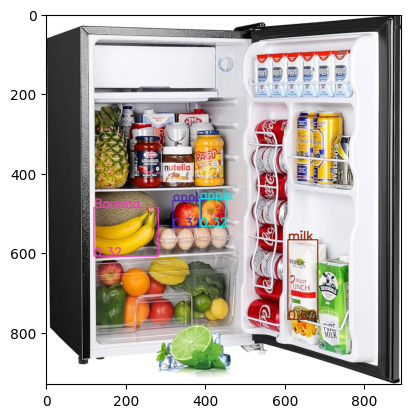

In [3]:
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2 
from ultralytics.utils.plotting import Annotator
import numpy as np


# Load the model with a custom configuration
model = YOLO('best.pt')
model.conf = 0.3  # Set a low confidence threshold for object detection

# Perform object detection on a specified image
results = model('../image/test.jpg', stream=True)

# Get class names from the model
class_names = model.names 

# Extract detected object classes from the results
name_detected = set()

img = cv2.imread('../image/test.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_height, img_width, _ = img.shape

for result in results:
    boxes = result.boxes.xyxy.tolist()
    classes = result.boxes.cls.tolist()
    names = result.names
    confidences = result.boxes.conf.tolist()
    for box, cls, conf in zip(boxes, classes, confidences):
        x1, y1, x2, y2 = box
        confidence = conf
        detected_class = cls
        name = names[int(cls)]
        name_detected.add(name)
        
        color = tuple(np.random.randint(0, 255, 3).tolist())
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
        cv2.putText(img, name, (int(x1), int(y1)), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)
        cv2.putText(img, str(round(confidence, 2)), (int(x1), int(y2)), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)
        
plt.imshow(img)
        
